<a href="https://colab.research.google.com/github/sigvehaug/Introduction-to-Python-for-Medical-Researchers/blob/master/05-Example-2-Medical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Python Programming for Medical Researchers, University of Bern, Sigve Haug


# 5. Example of a small medical image analysis with Python

(Use 60 minutes to go through this notebook on colab)
 
In medicine and many other fields images are often the data for diagnostics, training and inference. In this notebook we will step by step see how Python can be used to read, write and process images. It is only a very first introduction. Image processing is a large field which currently peaks with automatic diagnosis based on deep neural networks. However, also that is based on these basics.  

### Objectives
- Reading images (from the web, locally and google drive)
- What is an image?
- Processing images
- Saving images
- Managing data files on the filesystem

### Documentation on the applied Modules
- [skimage](https://scikit-image.org/docs/stable/api/api.html)
- [os](https://docs.python.org/3/library/os.html)
- [numpy](https://numpy.org/doc/stable/reference/) 

In the next session we will then cover more basic Python.


## Reading Images

A typical real life use case for a medical data scientist involves reading image files. These may be on a desktop, laptop, USB stick or somewhere on internet. Let us cover the different cases. 

There are several libraries for reading images. We use skimage (scientific python toolkit imaging module) as it is a very good one.

### Download from internet and then read from local file

If you are provided with a list of URL addresses, you can retrieve your images directly from internet. Either by using for example the wget command from the terminal (this works on colab which is linux):

In [7]:
! wget https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/ISIC_0000000.jpg

--2021-09-05 08:18:52--  https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/ISIC_0000000.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49964 (49K) [image/jpeg]
Saving to: ‘ISIC_0000000.jpg’

ISIC_0000000.jpg    100%[===================>]  48.79K  --.-KB/s    in 0.007s  

2021-09-05 08:18:52 (6.83 MB/s) - ‘ISIC_0000000.jpg’ saved [49964/49964]



In [64]:
! ls -l # The file is now stored locally:

total 60
drwxr-xr-x 2 root root  4096 Sep  5 10:30 data
-rw-r--r-- 1 root root 49964 Sep  5 08:18 ISIC_0000000.jpg
drwxr-xr-x 1 root root  4096 Sep  1 19:26 sample_data


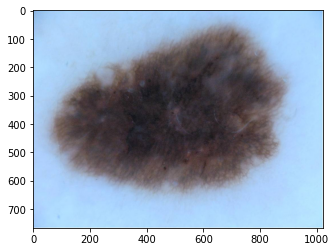

In [63]:
# Show the image
from skimage import io
import matplotlib.pyplot as plt
img = io.imread('ISIC_0000000.jpg')
plt.imshow(img)

### Read files directly from internet :

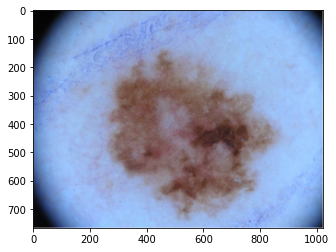

In [66]:
 url = 'https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/ISIC_0000002.jpg'
 img = io.imread(url)
 plt.imshow(img)

### Read from Google Drive

Many are using google drive for storing files. When working on colab it is convenient to mount your google drive and then read and write files from there.

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls -l drive/MyDrive/Courses/Python4Medicine/ISIC_0000000.jpg

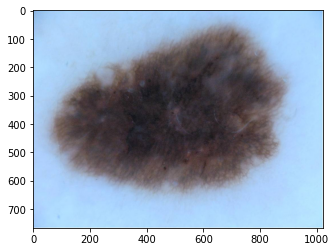

In [70]:
img = io.imread('drive/MyDrive/Courses/Python4Medicine/ISIC_0000000.jpg')
#print(skin.size,skin.shape,skin.dtype)
plt.imshow(img)

## What is an Image ?

An image is just a table with a cell per pixel. The cell contains a number which represents either black or white. For color pictures we need 3 tables per pixels as 3 colors are need to make up any color.

Thus, an image can be represented by a two dimensional array (or matrix) and can be processed with all the powerful tools of linear algebra. For example, addition, subtraction, multiplication, rotations etc. This tools are implemented in the python module numpy. An image is therefore just an numpy array.

Machine Learning software also needs (higher dimensional) arrays as input. So images as numpy arrays can be used by them right away.

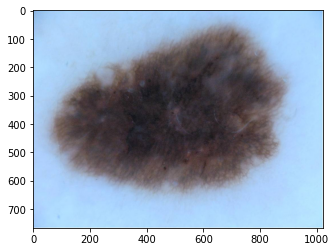

In [16]:
import matplotlib.pyplot as plt 
plt.imshow(skin) 

In [57]:
! ls -l data


total 80
-rw-r--r-- 1 root root 43908 Sep  5 10:25 ISIC_0000000.jpg
-rw-r--r-- 1 root root 34981 Sep  5 10:26 ISIC_0000001.jpg


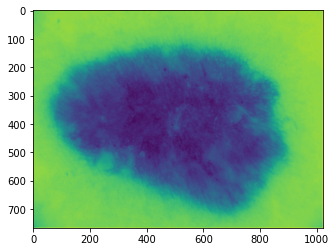

In [61]:
plt.imshow(io.imread('data/ISIC_0000000.jpg'))

## Image Processing Example

Let us look at a very simple processing example of images.


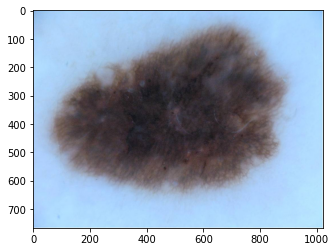

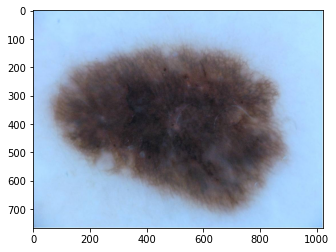

In [72]:
# Flip the image
import numpy as np
plt.imshow(img)
plt.show()
plt.imshow(np.flipud(img))
plt.show()

Image processing involves segmentation, noise subtraction, filtering, symmetry operations etc. We will look at more examples in a later session.

## Saving Images

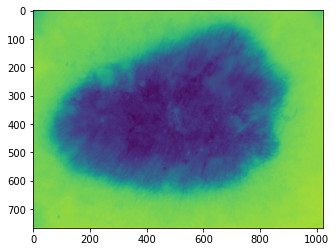

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.


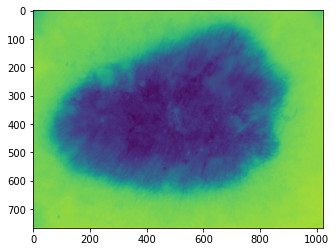

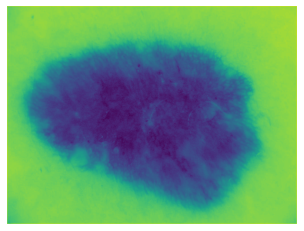

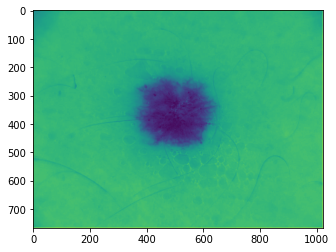

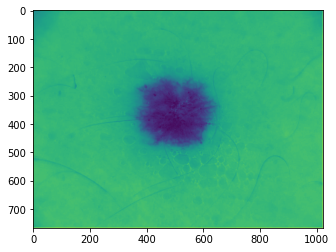

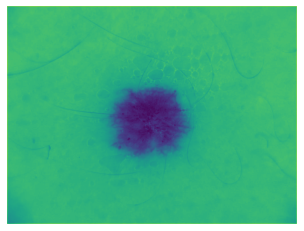

In [60]:
from skimage import io
import numpy as np
import shutil
import os
try:
  shutil.rmtree('data')
except:
  os.mkdir('data')
for i in range(2):
  url = 'https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/ISIC_000000'+str(i)+'.jpg'
  try:
    img = io.imread(url, as_gray=True)
  except:
    continue
  plt.imshow(img); plt.show()
  # Do some analysis or processing with the image
  plt.contour(img,[0, 50]);plt.imshow(img);plt.show() 
  plt.axis('off');
  plt.imshow(np.flipud(img));plt.show()
  # Write processed image to file 
  url = 'data/ISIC_000000'+str(i)+'.jpg'
  io.imsave(url,np.flipud(img))



After having processed the images, one often saves them for further usage. Here is a more complete examples which includes reading, some data management, a processing step and saving. 

# What is next ?

This is how you would use Python for data analysis in your daily work. Now we will take a step back and look at basic Python in a more systematic way. Please go to the next [notebook](https://github.com/sigvehaug/Introduction-to-Python-Programming-For-Medical-Researchers/blob/master/3-Basic-Python.ipynb) !